In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype== "O":
        cat.append(i)
    else:
        num.append(i)

In [7]:
cat

['Grade']

In [8]:
num

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

In [9]:
grade = df['Grade'].value_counts()

<BarContainer object of 3 artists>

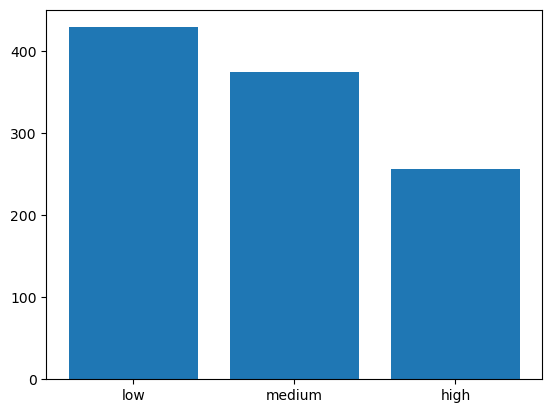

In [10]:
import matplotlib.pyplot as plt

plt.bar(x = grade.index, height = grade)

In [11]:
def treating_outliers(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    outliers=df[(df[col] < lf) | (df[col] > uf)]
    print('Percentage of outlies in ', col, outliers.shape[0]*100/df.shape[0])
    fig, ax=plt.subplots(1,2, figsize=(8,6))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col] < lf) | (df[col] > uf), col]=df[col].median()
    return lf,uf

Percentage of outlies in  pH 35.78847969782814


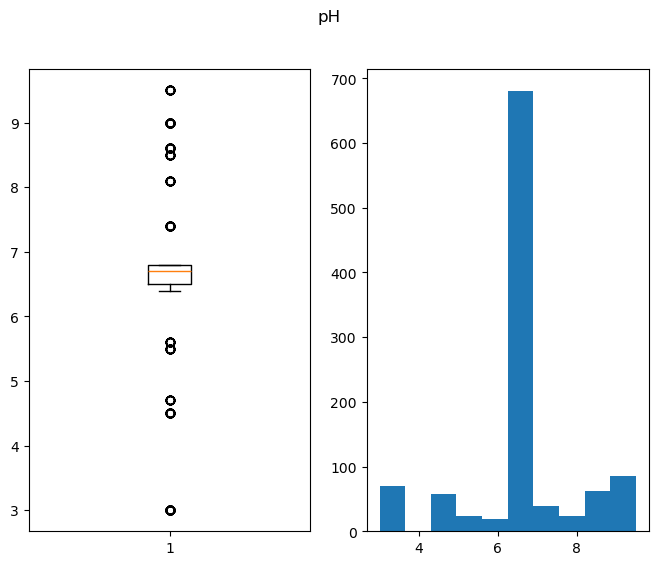

Percentage of outlies in  Temprature 9.726156751652502


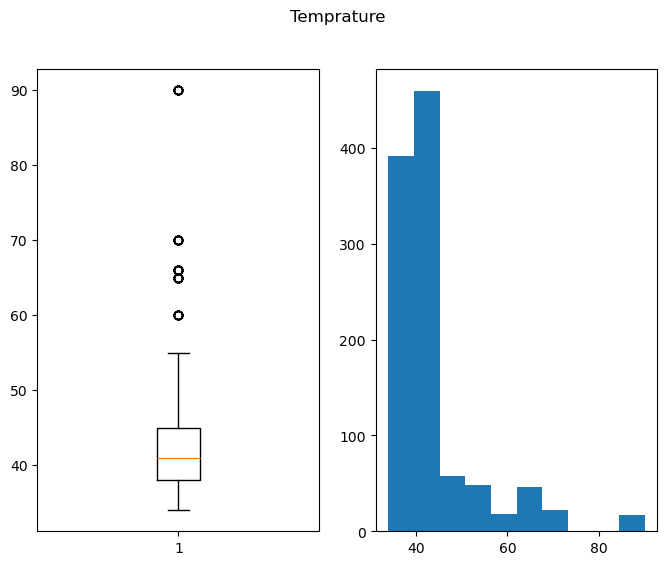

Percentage of outlies in  Taste 0.0


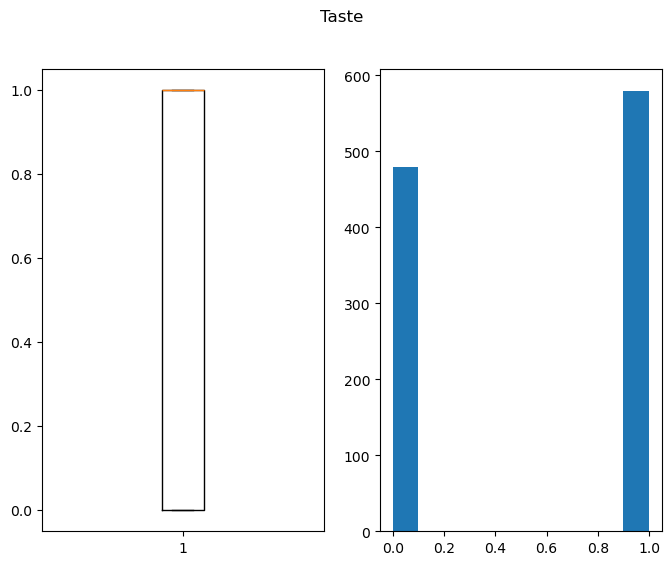

Percentage of outlies in  Odor 0.0


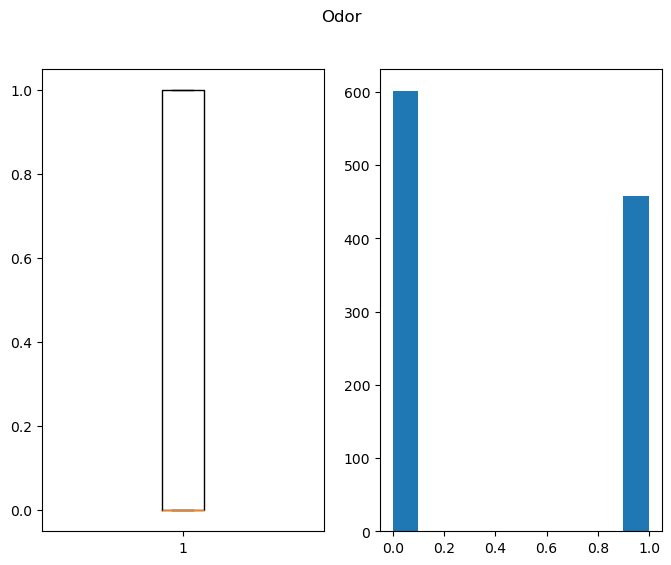

Percentage of outlies in  Fat  0.0


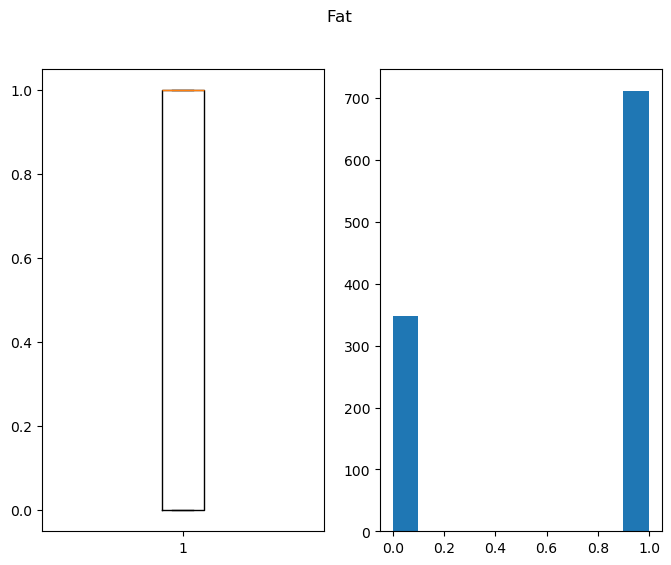

Percentage of outlies in  Turbidity 0.0


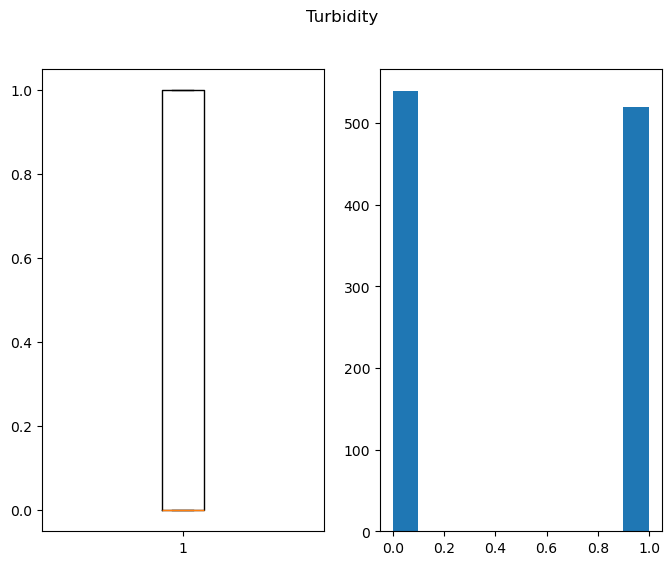

Percentage of outlies in  Colour 3.0217186024551466


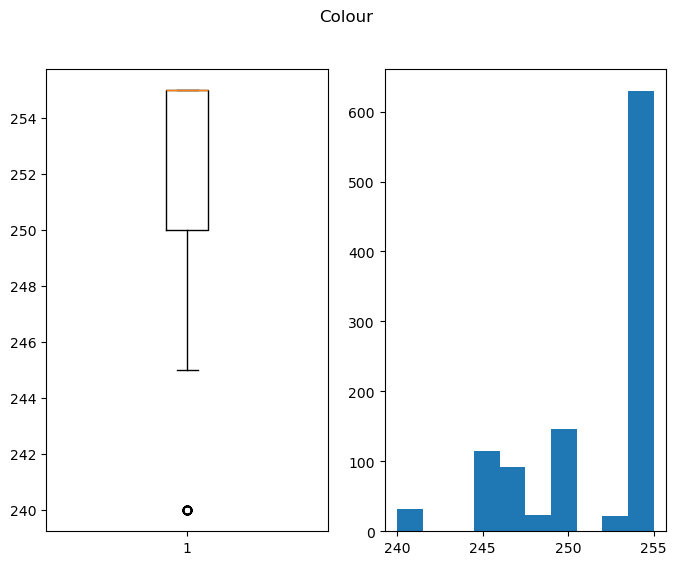

In [12]:
for col in num:
    treating_outliers(col)

In [13]:
df.drop(['pH'], axis = 1, inplace = True)
df

,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,35,1,0,1,0,254,high
1,36,0,1,0,1,253,high
2,41,1,1,1,1,246,low
3,34,1,1,0,1,255,low
4,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...
1054,45,1,1,0,0,247,medium
1055,38,1,0,1,0,255,high
1056,40,1,1,1,1,255,low
1057,43,1,0,1,0,250,high


In [14]:
cat=[]
num=[]

for i in df.columns:
    if df[i].dtype== "O":
        cat.append(i)
    else:
        num.append(i)

In [15]:
df.loc[:, num].corr()

,Temprature,Taste,Odor,Fat,Turbidity,Colour
Temprature,1.000000,-0.170368,0.250833,0.120066,0.243595,-0.161570
Taste,-0.170368,1.000000,0.017582,0.324149,0.055755,-0.224990
Odor,0.250833,0.017582,1.000000,0.314505,0.457935,-0.028384
Fat,0.120066,0.324149,0.314505,1.000000,0.329264,-0.041223
Turbidity,0.243595,0.055755,0.457935,0.329264,1.000000,0.156960
Colour,-0.161570,-0.224990,-0.028384,-0.041223,0.156960,1.000000


<Axes: >

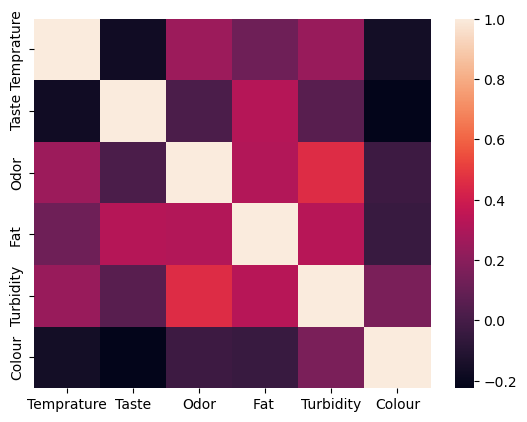

In [16]:
import seaborn as sns

sns.heatmap(df.loc[:, num].corr())

In [17]:
cat

['Grade']

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [20]:
df['Grade'].replace(to_replace = ['low', 'medium', 'high'], value = [0, 1, 2], inplace = True)

C:\Users\randh\AppData\Local\Temp\ipykernel_3028\3930662477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Grade'].replace(to_replace = ['low', 'medium', 'high'], value = [0, 1, 2], inplace = True)
C:\Users\randh\AppData\Local\Temp\ipykernel_3028\3930662477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [21]:
X = df.drop(['Grade'], axis= 1)
X

,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,35,1,0,1,0,254
1,36,0,1,0,1,253
2,41,1,1,1,1,246
3,34,1,1,0,1,255
4,37,0,0,0,0,255
...,...,...,...,...,...,...
1054,45,1,1,0,0,247
1055,38,1,0,1,0,255
1056,40,1,1,1,1,255
1057,43,1,0,1,0,250


In [22]:
y = df['Grade']
y

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

In [23]:
X = X.values
y = y.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [26]:
# Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(max_depth = 10)

In [29]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [30]:
y_pred_train = dt.predict(x_train)

In [31]:
y_pred_test = dt.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y_train, y_pred_train))

0.9190283400809717


In [34]:
print(accuracy_score(y_test, y_pred_test))

0.8773584905660378


In [35]:
# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(max_depth = 10)

In [38]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [39]:
rf_train_pred = rf.predict(x_train)

In [40]:
accuracy_score(y_train, rf_train_pred)

0.9190283400809717

In [41]:
rf_test_pred = rf.predict(x_test)

In [42]:
accuracy_score(y_test, rf_test_pred)

0.8647798742138365